## Import Essential Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Import Dataset

In [3]:
df = pd.read_csv('framingham.csv')
df[0:10]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## Describe the dataset

In [4]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.00,4240.00,4135.00,4240.00,4211.00,4187.00,4240.00,4240.00,4240.00,4190.00,4240.00,4240.00,4221.00,4239.00,3852.00,4240.00
mean,0.43,49.58,1.98,0.49,9.01,0.03,0.01,0.31,0.03,236.70,132.35,82.90,25.80,75.88,81.96,0.15
std,0.50,8.57,1.02,0.50,11.92,0.17,0.08,0.46,0.16,44.59,22.03,11.91,4.08,12.03,23.95,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,0.00,42.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00,0.00
50%,0.00,49.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00,0.00
75%,1.00,56.00,3.00,1.00,20.00,0.00,0.00,1.00,0.00,263.00,144.00,90.00,28.04,83.00,87.00,0.00
max,1.00,70.00,4.00,1.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


### Information about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## Analyse the target variable

<AxesSubplot:>

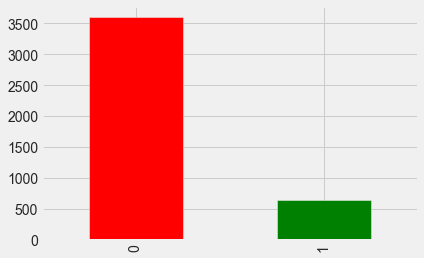

In [6]:
df.TenYearCHD.value_counts().plot(kind="bar", color=["red", "green"])

## Total Null values

In [7]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Total percentage missing values

In [8]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

0.9507665094339623


#### fill data at null place

In [9]:
df["glucose"].fillna( method ='ffill', inplace = True)

In [10]:
df["BPMeds"].fillna( method ='ffill', inplace = True)

In [11]:
df["totChol"].fillna( method ='ffill', inplace = True)

In [12]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose              0
TenYearCHD           0
dtype: int64

### Drop less correlated value from the features

In [13]:
df.drop(['education','cigsPerDay'],axis=1)

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,0,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1,0.00,0,0,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,1,0.00,0,1,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,1,0.00,0,0,0,285.00,130.00,84.00,23.10,85.00,85.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,0.00,0,0,0,248.00,131.00,72.00,22.00,84.00,86.00,0
4236,0,44,1,0.00,0,0,0,210.00,126.50,87.00,19.16,86.00,86.00,0
4237,0,52,0,0.00,0,0,0,269.00,133.50,83.00,21.47,80.00,107.00,0
4238,1,40,0,0.00,0,1,0,185.00,141.00,98.00,25.60,67.00,72.00,0


### Some more information about the datasets

In [14]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==================================================================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

male : [1 0]
age : [39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
education : [ 4.  2.  1.  3. nan]
currentSmoker : [0 1]
cigsPerDay : [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BPMeds : [0. 1.]
prevalentStroke : [0 1]
prevalentHyp : [0 1]
diabetes : [0 1]
totChol : [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237. 311. 208. 252. 261. 179. 194. 267. 216. 240.
 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202. 213.
 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269. 275.
 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246. 150.
 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159. 174. 242.
 301. 167. 308. 325. 229. 236. 224. 253. 464. 171. 186. 227. 249. 1

### Checking correlation between columns

In [15]:
print(df.corr()["TenYearCHD"].abs().sort_values(ascending=False))

TenYearCHD        1.00
age               0.23
sysBP             0.22
prevalentHyp      0.18
diaBP             0.15
glucose           0.11
diabetes          0.10
male              0.09
BPMeds            0.09
totChol           0.08
BMI               0.08
prevalentStroke   0.06
cigsPerDay        0.06
education         0.05
heartRate         0.02
currentSmoker     0.02
Name: TenYearCHD, dtype: float64


#### This shows that most columns are not more correlated with target, but 'currentSmoker' and 'heartRate' is very weakly correlated.

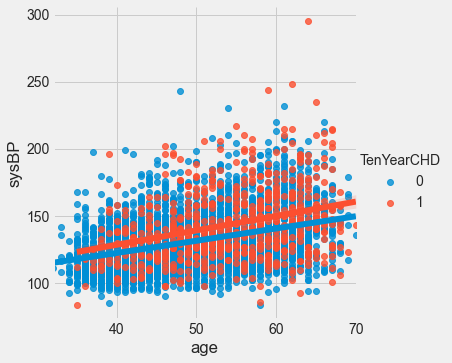

In [16]:
sns.lmplot(x='age', y='sysBP',hue='TenYearCHD', data=df)

### Replace all values with the most frequent values of the that column

In [17]:
columns_None = ['glucose','heartRate','totChol','BPMeds','cigsPerDay','education']
df[columns_None] = df[columns_None].fillna(df.mode().iloc[0])

In [18]:
df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [19]:
df.drop(['BMI'],axis=1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,heartRate,glucose,TenYearCHD
0,1,39,4.00,0,0.00,0.00,0,0,0,195.00,106.00,70.00,80.00,77.00,0
1,0,46,2.00,0,0.00,0.00,0,0,0,250.00,121.00,81.00,95.00,76.00,0
2,1,48,1.00,1,20.00,0.00,0,0,0,245.00,127.50,80.00,75.00,70.00,0
3,0,61,3.00,1,30.00,0.00,0,1,0,225.00,150.00,95.00,65.00,103.00,1
4,0,46,3.00,1,23.00,0.00,0,0,0,285.00,130.00,84.00,85.00,85.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.00,1,20.00,0.00,0,0,0,248.00,131.00,72.00,84.00,86.00,0
4236,0,44,1.00,1,15.00,0.00,0,0,0,210.00,126.50,87.00,86.00,86.00,0
4237,0,52,2.00,0,0.00,0.00,0,0,0,269.00,133.50,83.00,80.00,107.00,0
4238,1,40,3.00,0,0.00,0.00,0,1,0,185.00,141.00,98.00,67.00,72.00,0


In [20]:
df = df.dropna()

### show a few features with their Mutual Info scores

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
x = df.copy()
y = x.pop('TenYearCHD')

In [23]:
x

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.00,0,0.00,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00
1,0,46,2.00,0,0.00,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00
2,1,48,1.00,1,20.00,0.00,0,0,0,245.00,127.50,80.00,25.34,75.00,70.00
3,0,61,3.00,1,30.00,0.00,0,1,0,225.00,150.00,95.00,28.58,65.00,103.00
4,0,46,3.00,1,23.00,0.00,0,0,0,285.00,130.00,84.00,23.10,85.00,85.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.00,1,20.00,0.00,0,0,0,248.00,131.00,72.00,22.00,84.00,86.00
4236,0,44,1.00,1,15.00,0.00,0,0,0,210.00,126.50,87.00,19.16,86.00,86.00
4237,0,52,2.00,0,0.00,0.00,0,0,0,269.00,133.50,83.00,21.47,80.00,107.00
4238,1,40,3.00,0,0.00,0.00,0,1,0,185.00,141.00,98.00,25.60,67.00,72.00


In [24]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4221, dtype: int64

## Train Test split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [26]:
X_train.shape

(3376, 15)

In [27]:
X_test.shape

(845, 15)

In [28]:
Y_train.shape

(3376,)

In [29]:
Y_test.shape

(845,)

## Model Fitting

In [30]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
Y_pred_lr.shape

(845,)

In [33]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 82.96 %


# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [35]:
Y_pred_nb.shape

(845,)

In [36]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 81.54 %


# Support Vector Machine 

In [37]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [38]:
Y_pred_svm.shape

(845,)

In [39]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.31 %


# K Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [41]:
Y_pred_knn.shape

(845,)

In [42]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 82.96 %


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [44]:
print(Y_pred_dt.shape)

(845,)


In [45]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 76.21 %


# XGBoost

In [46]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[13:44:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [47]:
Y_pred_xgb.shape

(845,)

In [48]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 81.66 %


### Final Accuracy of all Models that which Model is best fitted

In [49]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 82.96 %
The accuracy score achieved using Naive Bayes is: 81.54 %
The accuracy score achieved using Support Vector Machine is: 83.31 %
The accuracy score achieved using K-Nearest Neighbors is: 82.96 %
The accuracy score achieved using Decision Tree is: 76.21 %
The accuracy score achieved using XGBoost is: 81.66 %


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

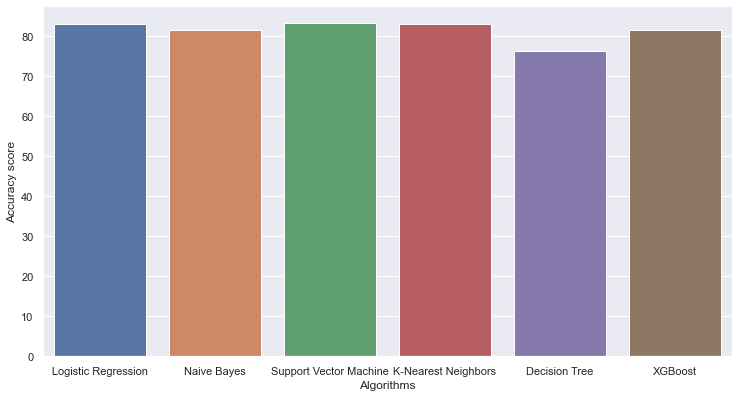

In [53]:
sns.set(rc={'figure.figsize':(11,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

#### The accuracy score achieved using Support Vector Machine is: 83.31 % this model is most accurate model of all the model trained in this datasets